In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from laspy.file import File
from os import listdir
from os.path import isfile, join
from sklearn import preprocessing
import pptk

from pathlib import Path
%matplotlib inline

In [48]:
file_root_path = Path(r"C:\Users\Kazi Abir Adnan\The University of Melbourne\Trent Penman - Sites")
las_format_folder = file_root_path / 'las_format'
mypath = r"C:\Users\Kazi Abir Adnan\The University of Melbourne\Trent Penman - Sites\las_format"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith('las')]
onlyfiles

['101 sharps.las',
 '104 sharps.las',
 '118 Dunse.las',
 '119 Dunse.las',
 '126_Wye.las',
 '184 Big Hill.las',
 '60 Bambra aireys.las',
 '84ish seaview.las',
 '85 Seaview.las',
 '94 seaview.las',
 '95 seaview.las',
 'carpark.las',
 'carpark_1.las',
 'SP01.las',
 'SP02 Big Hill.las',
 'SP03_Stony.las',
 'SP04_Gentle_Annie_Creek.las',
 'SP06_Gentle_Annie.las',
 'SP08 Bambra Aireys nearIronbark.las',
 'SP08_Bambra_Aireys_nearIronbark.las',
 'SP09_Coalmine_ck.las',
 'SP10_Moggs_Creek.las',
 'SP11_Seaview_extra.las',
 'SP12_Stony.las',
 'SP13_Garvey.las',
 'SP14_Garvey.las']

# Functions

In [49]:
def makeDf(file_location_las):
    """
    file_location_las: Path to the las file.
    return:
        pandas data frame with features
            x ,y ,z ( in meters )
            r ,g ,b
    """
    inFile = File(file_location_las, mode='r')
    df_las = pd.DataFrame(columns = ["X", "Y", "Z", "Red", "Green", "Blue"])
    df_las['X'] = inFile.get_x_scaled()
    df_las['Y'] = inFile.get_y_scaled()
    df_las['Z'] = inFile.get_z_scaled()
    df_las['Green'] = inFile.green/256
    df_las['Red'] = inFile.red/256
    df_las['Blue'] = inFile.blue/256
#     print("Length of dataset:", df_las.shape[0])

    return df_las


file_of_interest =  'SP09_Coalmine_ck.las'

file_location = las_format_folder/file_of_interest
print(file_location)


C:\Users\Kazi Abir Adnan\The University of Melbourne\Trent Penman - Sites\las_format\SP09_Coalmine_ck.las


In [4]:
def points_within_diameters(df , diameter ):
    """
    df: Data frame want to filter out the rows.
    diameter:
        diameter from the center point (in meter)
    
    return:
        a duplicate data frame.
        usage df = points_with_diameters(df, diameter) to overwrite the existing object to pontentially 
        save memory usage.

    """
    
    

    df_filtered = df[(df['X'] <= diameter) & (df['X'] >= -diameter) & (df['Y'] <= diameter) & (df['Y'] >= -diameter)]
    return df_filtered
# assert(points_within_diameters(df , DIAMETER_OF_INTEREST).shape == df_filtered.shape)

In [5]:
def filter_by_high_rage(df , z_min = CROSS_SECTION_MIN, z_max = CROSS_SECTION_MAX):
    """
    df: Data frame want to filter out the rows.
    z_min and z_max:
        range of high intereseted.
    
    return:
        a duplicate data frame.
        usage df = points_with_diameters(df, diameter) to overwrite the existing object to pontentially 
        save memory usage.
    """
    
    df_z_filtered = df_filtered[(df_filtered['Z'] >= z_min) & 
                            (df_filtered['Z'] <= z_max)]
    return df_z_filtered

NameError: name 'CROSS_SECTION_MIN' is not defined

In [42]:
#2d pllotting
def plot_2d(df):
    fig=plt.figure(figsize=(12, 8), dpi= 300, facecolor='w', edgecolor='k')
    plt.scatter(df['X'].values, df['Y'].values,c = df[['Red','Green','Blue']].values/255.0, s= 0.1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [13]:
def plot_pptk(df):
    v = pptk.viewer(df[['X', 'Y', 'Z']])
    v.attributes(df[['Red', 'Green', 'Blue']] / 255.)
    v.set(point_size=0.001)

# Calling

In [50]:
df = makeDf(file_location)
print(df.shape)
df.head()

(8709338, 6)


,X,Y,Z,Red,Green,Blue
0,-77.656273,-13.442257,193.414886,52.0,37.0,42.0
1,-76.237320,-5.927486,194.345123,70.0,61.0,64.0
2,-76.372742,-5.942235,194.712402,60.0,44.0,53.0
3,-62.812405,-66.370705,186.572083,125.0,124.0,82.0
4,-34.092205,-73.266846,187.219620,93.0,79.0,57.0


### Check the boundary of data.

In [51]:
print("X: min : {} meters   max {} meters ".format(df['X'].min() , df['X'].max()))
print("Y: min : {} meters   max {} meters ".format(df['Y'].min() , df['Y'].max()))
print("Z: min : {} meters   max {} meters ".format(df['Z'].min() , df['Z'].max()))

X: min : -97.36498266184799 meters   max 124.91867835505202 meters 
Y: min : -136.876342741972 meters   max 130.05627447610598 meters 
Z: min : 145.95646664968038 meters   max 242.95291136502078 meters 


In [ ]:
df['Z'] = np.where(df['Z'] > df['Z'].min(), df['Z'] - abs(df['Z'].min()), df['Z'])

### Filter out the points that outside the a given diameter from the center point.

In [53]:
DIAMETER_OF_INTEREST = 15

D = DIAMETER_OF_INTEREST
df_filtered = df[(df['X'] <= D) & (df['X'] >= -D) & (df['Y'] <= D) & (df['Y'] >= -D)]

print("Adter filterd out points outside the diameter of {} meters.\n".format(DIAMETER_OF_INTEREST))

print("Filtered df shape : {}\n".format(df_filtered.shape))

print("Percentage of points remain : {}\n".format(df_filtered.shape[0] / df.shape[0]))

df_filtered.head()

Adter filterd out points outside the diameter of 15 meters.

Filtered df shape : (8252511, 6)

Percentage of points remain : 0.9475474484972337



,X,Y,Z,Red,Green,Blue
30637,-13.183119,-14.865200,202.143387,28.0,24.0,42.0
32430,-14.563833,-13.722750,196.290375,57.0,46.0,34.0
32431,-14.575973,-13.702663,196.267212,49.0,34.0,29.0
32432,-14.571939,-13.701556,196.290298,53.0,39.0,32.0
32433,-14.594002,-13.708318,196.310120,55.0,44.0,35.0



### Picking the range of cross section. (Z axis). 

### Should probably use the z.min as the reference point , and then we pick the offest to this reference point.

In [54]:
z_min = df_filtered['Z'].min()

print("The reference level is {} meter ".format(z_min))
# Picking the range of cross section. (Z axis).
CROSS_SECTION_MIN = 4.5 + z_min
CROSS_SECTION_MAX = 4.55 + z_min

The reference level is 194.799392728248 meter 


In [55]:
df_z_filtered = df_filtered[(df_filtered['Z'] >= CROSS_SECTION_MIN) & 
                            (df_filtered['Z'] <= CROSS_SECTION_MAX)]

print("Shape after filtered by height = {} \n".format(df_z_filtered.shape))

print("Percentage of points remain : {}\n".format(df_z_filtered.shape[0] / df.shape[0]))

Shape after filtered by height = (34185, 6) 

Percentage of points remain : 0.003925097406944133



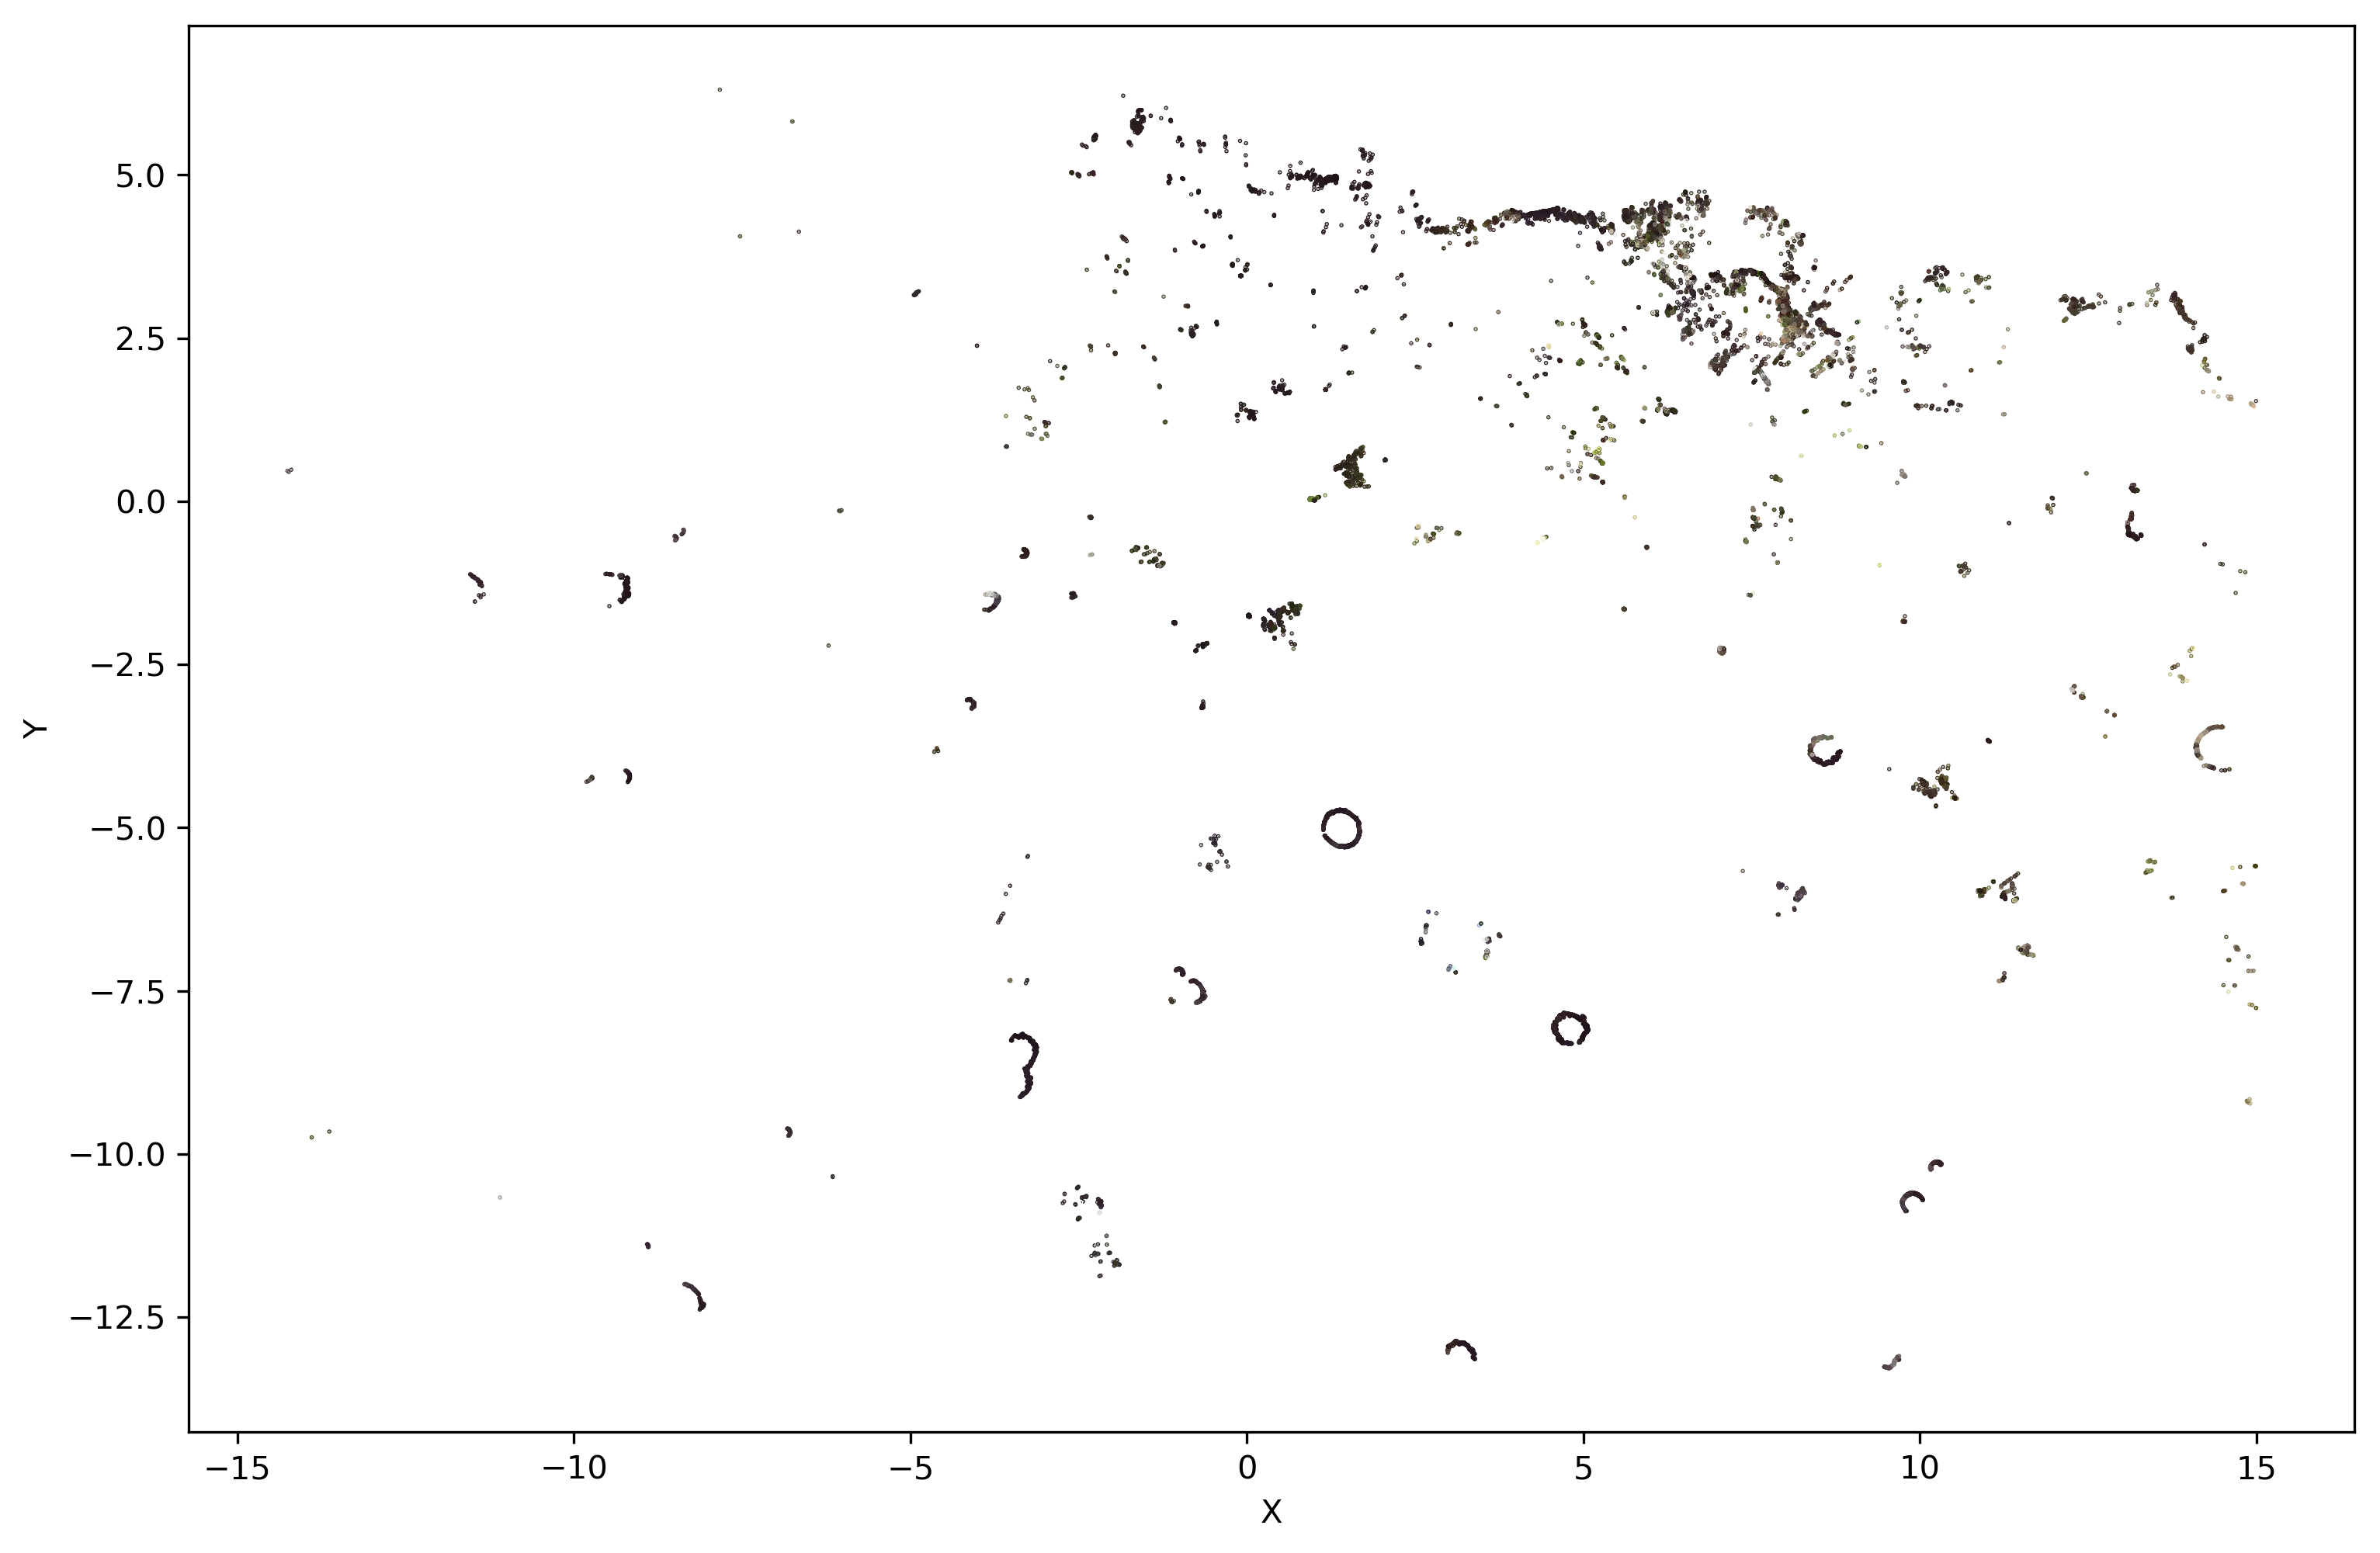

In [56]:
SIZE_USED = 1.0

SIZE = int(df_z_filtered.shape[0] * SIZE_USED)

# df_z_filtered.sample(SIZE)

plot_2d(df_z_filtered.sample(SIZE, random_state = 42))
# plot_2d(df_z_filtered)

### Now we can compare the above 2D result with the 3D view from pptk

In [58]:
plot_pptk(df_z_filtered)

In [59]:
plot_pptk(df)

In [60]:
plot_pptk(df_filtered)

# DBSCAN Clustering

In [61]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import cluster, mixture
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [62]:
SIZE_USED = 1.0
SIZE = int(df_z_filtered.shape[0] * SIZE_USED)
print(SIZE)
X = df_z_filtered.sample(SIZE, random_state = 42).values
db = DBSCAN(eps=6, min_samples=20).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

34185
Estimated number of clusters: 6
Estimated number of noise points: 3931


In [35]:
set(labels)

{-1, 0, 1, 2, 3, 4}

7 7


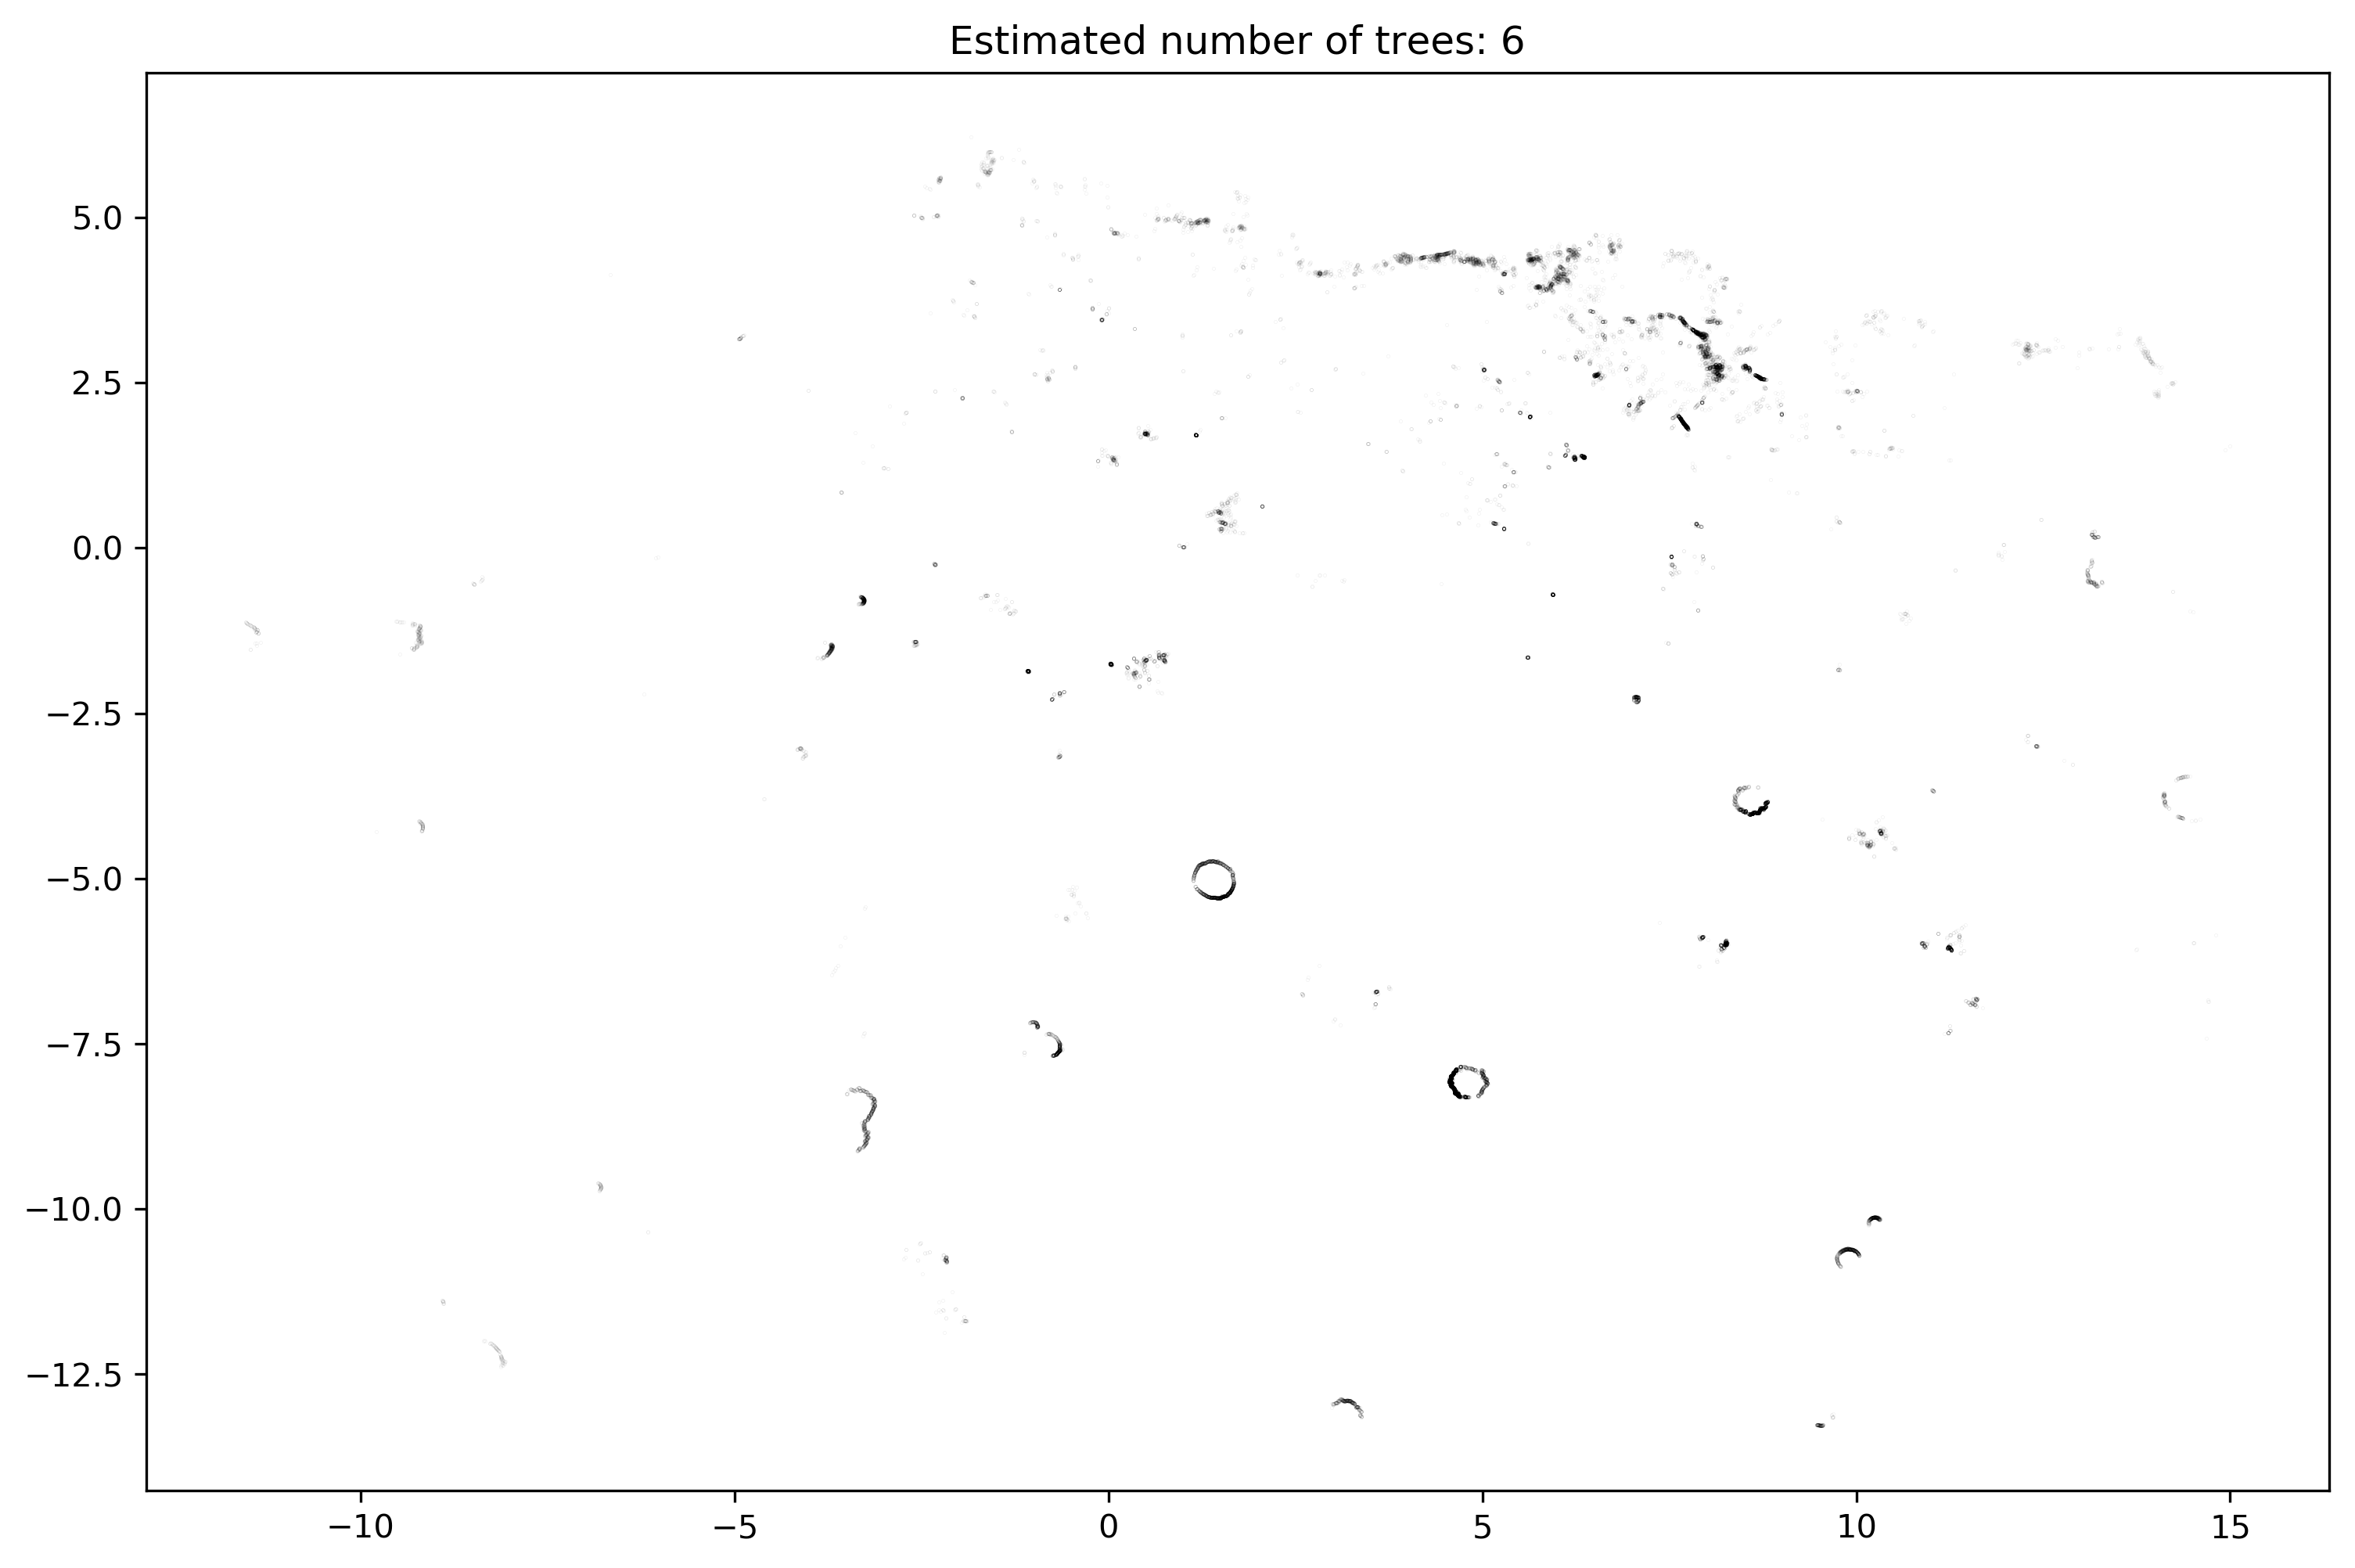

In [69]:
import matplotlib.pyplot as plt
# %matplotlib notebook

# Black removed and is used for noise instead.
fig=plt.figure(figsize=(12, 8), dpi= 300, facecolor='w', edgecolor='k')
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
print(len(unique_labels), len(colors))
for k, col in zip(unique_labels, colors):
    if k == -1:
        pass
        # Black used for noise.
#         xy = X[np.where(labels == -1)[0]]
#         plt.plot(xy[:, 0], xy[:, 1], 'x', color='black',markersize=1)
    elif k == 0:
        class_member_mask = (labels == k)
#         xy = X[class_member_mask & core_samples_mask]
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markersize=0.01, markeredgecolor='k')
#         xy = X[class_member_mask & ~core_samples_mask]
#         plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markersize=0.1)

    else:
        pass
#         class_member_mask = (labels == k)
#         xy = X[class_member_mask & core_samples_mask]
#         xy = X[class_member_mask]
#         plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markersize=0.1)
#         xy = X[class_member_mask & ~core_samples_mask]
#         plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markersize=0.1)

plt.title('Estimated number of trees: %d' % n_clusters_)
plt.show()